# Analýza spokojenosti zákazníků letecké společnosti

### ESF MUNI, Datamining, jarní semestr 2023

Cílem tohoto projektu je provést datovou analýzu průzkumu spokojenosti 
zákazníků se službami nejmenované letecké společnosti.

Analýza poskytne informace a poznatky pro management letecké společnosti. 
Díky lepšímu porozumění zákazníkům, jejich potřebám a preferencím mohou následně 
přijímat informovaná rozhodnutí ohledně rozvoje kvality poskytovaných služeb, 
může přinést byznysový přínos v podobě zvýšené spokojenosti zákazníků a jejich loajality. 
Pokusíme se pochopit, které faktory nejvíce ovlivňují spokojenost. 
Ve kterých službách panuje nespokojenost a proč. 

Obsah datasetu je následující:

    1. id
    2. spokojenost
    3. pohlavi
    4. typ_zakaznika
    5. vek
    6. typ_cestovani
    7. trida
    8. vzdalenost_letu
    9. komfort_sedadla
    10. cas_odlet_prilet_pohodlnost
    11. jidlo_a_piti
    12. poloha_gate
    13. wifi_na_palube
    14. zabava_na_palube
    15. online_podpora
    16. snadnost_online_rezervace
    17. sluzby_na_palube
    18. sluzby_pro_prostor_na_nohy
    19. manipulace_s_batohem
    20. checkin_sluzba
    21. cistota
    22. online_nastup
    23. zpozdeni_odletu_v_minutach
    24. zpozdeni_priletu_v_minutach

Dataset je k dispozici na webu kaggle.com
https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

Konkrétní otázky, které se pokusíme zodpovědět:

1. Které proměnné ovlivňují zákazníkovu spokojenost?
2. Jaká je celková spokojenost v porovnání mezi loajálními a neloajálními zákazníky?
3. Jak souvisí celková spokojenost s letovými vzdálenostmi a věkovými demografickými údaji?
4. Mají zpoždění vliv na celkovou spokojenost zákazníků?
5. Hypotéza: Cestující byznys třídy jsou spokojenější než cestující Economy třídy.

#### Jaká jsou omezení datasetu?

1. Ceny letenek nejsou známy. Lze pouze usuzovat, že business třída je dřažší
2. Spokojenost je definována velmi úzce dvěma hodnotami (spokojený a neutrální/nespokojený)
3. O datasetu nejsou známy žádné doprovodné informace
3. Dobrou zprávou je, že hodnocené služby letecké společnosti jsou už ze svého názvu jasně pochopitelné

In [271]:
# Načtení průzkumu v excelovském .xlsx formátu uloženého ve working directory

library(readxl)

f <- read_excel("satisfaction.xlsx")

#### V první časti se podívame na obsah datasetu (popisná statistika a explorativní analýza)

In [173]:
# Názvy sloupců jsou v angličtině

colnames(f)

[1] "id"                                "satisfaction_v2"                  
 [3] "Gender"                            "Customer Type"                    
 [5] "Age"                               "Type of Travel"                   
 [7] "Class"                             "Flight Distance"                  
 [9] "Seat comfort"                      "Departure/Arrival time convenient"
[11] "Food and drink"                    "Gate location"                    
[13] "Inflight wifi service"             "Inflight entertainment"           
[15] "Online support"                    "Ease of Online booking"           
[17] "On-board service"                  "Leg room service"                 
[19] "Baggage handling"                  "Checkin service"                  
[21] "Cleanliness"                       "Online boarding"                  
[23] "Departure Delay in Minutes"        "Arrival Delay in Minutes"

In [273]:
# Pro příjemnější práci názvy sloupců přejmenujeme

colnames(f) <- c("id", "spokojenost", "pohlavi", "typ_zakaznika", "vek", 
                 "typ_cestovani", "trida", "vzdalenost_letu", "komfort_sedadla",
                 "cas_odlet_prilet_pohodlnost", "jidlo_a_piti", "poloha_gate", 
                 "wifi_na_palube", "zabava_na_palube", "online_podpora",
                 "snadnost_online_rezervace", "sluzby_na_palube", 
                 "sluzby_pro_prostor_na_nohy", "manipulace_s_batohem",
                 "checkin_sluzba", "cistota", "online_nastup", 
                 "zpozdeni_odletu_v_minutach", "zpozdeni_priletu_v_minutach")

In [274]:
# Vypsání nových řádků

colnames(f)
length(colnames(f))

[1] "id"                          "spokojenost"                
 [3] "pohlavi"                     "typ_zakaznika"              
 [5] "vek"                         "typ_cestovani"              
 [7] "trida"                       "vzdalenost_letu"            
 [9] "komfort_sedadla"             "cas_odlet_prilet_pohodlnost"
[11] "jidlo_a_piti"                "poloha_gate"                
[13] "wifi_na_palube"              "zabava_na_palube"           
[15] "online_podpora"              "snadnost_online_rezervace"  
[17] "sluzby_na_palube"            "sluzby_pro_prostor_na_nohy" 
[19] "manipulace_s_batohem"        "checkin_sluzba"             
[21] "cistota"                     "online_nastup"              
[23] "zpozdeni_odletu_v_minutach"  "zpozdeni_priletu_v_minutach"

[1] 24

In [275]:
# Zkontrolujeme, zda se v datasetu vyskytují chybějící hodnoty
sum(is.na(f))

# Čištění, zbavme se prázdných hodnot
f <- na.omit(f)

# Zkontrolujeme výsledek
sum(is.na(f))

[1] 393

[1] 0

Původní dataset je poměrně čistý, jednoduchý příkaz na odstranění
chybějících hodnot nás ochudil nanejvýš o 0,3 % ze všech řádků.

In [276]:
# Rozměry souboru

dim(f)

[1] 129487     24

In [183]:
# Začněme seznámením s obsahem sloupců

head(f, 3)

id,spokojenost,pohlavi,typ_zakaznika,vek,typ_cestovani,trida,vzdalenost_letu,komfort_sedadla,cas_odlet_prilet_pohodlnost,...,online_podpora,snadnost_online_rezervace,sluzby_na_palube,sluzby_pro_prostor_na_nohy,manipulace_s_batohem,checkin_sluzba,cistota,online_nastup,zpozdeni_odletu_v_minutach,zpozdeni_priletu_v_minutach
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0


Z náhledu výše lze rozdělit 24 proměnných do dvou kategorií:

1. Kategorické proměnné (spokojenost, pohlaví, typ zákazníka, tp cestování, třída)
2. Ordinální (faktorové) proměnné s hodnotami 0 až 5, které slouží jako hodnocení 
   (komfort sedadla, online podpora, služby na palubě apod.). 
Jedná se vždy o proměnné popisující služby aerolinek.
3. Jsou zde i kvantitativní proměnné jako vzdálenost letu v kilometrech 
   nebo doba zpoždění v minutách.


    1. id
    2. spokojenost
    3. pohlavi
    4. typ_zakaznika
    5. vek
    6. typ_cestovani
    7. trida
    8. vzdalenost_letu
---
    9. komfort_sedadla
    10. cas_odlet_prilet_pohodlnost
    11. jidlo_a_piti
    12. poloha_gate
    13. wifi_na_palube
    14. zabava_na_palube
    15. online_podpora
    16. snadnost_online_rezervace
    17. sluzby_na_palube
    18. sluzby_pro_prostor_na_nohy
    19. manipulace_s_batohem
    20. checkin_sluzba
    21. cistota
    22. online_nastup
---
    23. zpozdeni_odletu_v_minutach
    24. zpozdeni_priletu_v_minutach

In [100]:
# Popisná statistika
summary(f)

       id          spokojenost         pohlavi          typ_zakaznika     
 Min.   :     1   Min.   :-1.00000   Length:129487      Length:129487     
 1st Qu.: 32495   1st Qu.:-1.00000   Class :character   Class :character  
 Median : 64972   Median : 1.00000   Mode  :character   Mode  :character  
 Mean   : 64958   Mean   : 0.09481                                        
 3rd Qu.: 97416   3rd Qu.: 1.00000                                        
 Max.   :129880   Max.   : 1.00000                                        
      vek        typ_cestovani         trida           vzdalenost_letu
 Min.   : 7.00   Length:129487      Length:129487      Min.   :  50   
 1st Qu.:27.00   Class :character   Class :character   1st Qu.:1359   
 Median :40.00   Mode  :character   Mode  :character   Median :1924   
 Mean   :39.43                                         Mean   :1981   
 3rd Qu.:51.00                                         3rd Qu.:2543   
 Max.   :85.00                                   

In [215]:
# Průměrně zpoždění odletu činilo do 15 minut. Maximální pak bylo až 26,5 hodiny.
max(f$zpozdeni_odletu_v_minutach)/60

[1] 26.53333

In [101]:
library(skimr)

# Níže vidíme datové třídy pro jednotlivé sloupce
skim(f)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,pohlavi,0,1,4,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,typ_zakaznika,0,1,14,17,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,typ_cestovani,0,1,15,15,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,trida,0,1,3,8,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,factor,komfort_sedadla,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 29096, 2: 28645, 4: 28315, 1: 20882",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,cas_odlet_prilet_pohodlnost,0,1,NA,NA,NA,NA,NA,FALSE,6,"4: 29504, 5: 26723, 3: 23110, 2: 22735",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,jidlo_a_piti,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 28065, 4: 27129, 2: 27078, 1: 21008",NA,NA,NA,NA,NA,NA,NA,NA
8,factor,poloha_gate,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 33451, 4: 29997, 2: 24441, 1: 22497",NA,NA,NA,NA,NA,NA,NA,NA
9,factor,wifi_na_palube,0,1,NA,NA,NA,NA,NA,FALSE,6,"4: 31474, 5: 28738, 3: 27518, 2: 26957",NA,NA,NA,NA,NA,NA,NA,NA


-- Data Summary ------------------------
                           Values
Name                       f     
Number of rows             129487
Number of columns          24    
_______________________          
Column type frequency:           
  factor                   14    
  character                4     
  numeric                  6     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
   skim_variable               n_missing complete_rate ordered n_unique
 1 komfort_sedadla                     0             1 FALSE          6
 2 cas_odlet_prilet_pohodlnost         0             1 FALSE          6
 3 jidlo_a_piti                        0             1 FALSE          6
 4 poloha_gate                         0             1 FALSE          6
 5 wifi_na_palube                      0             1 FALSE          6
 6 zabava_na_palube                    0             1 FALSE          6

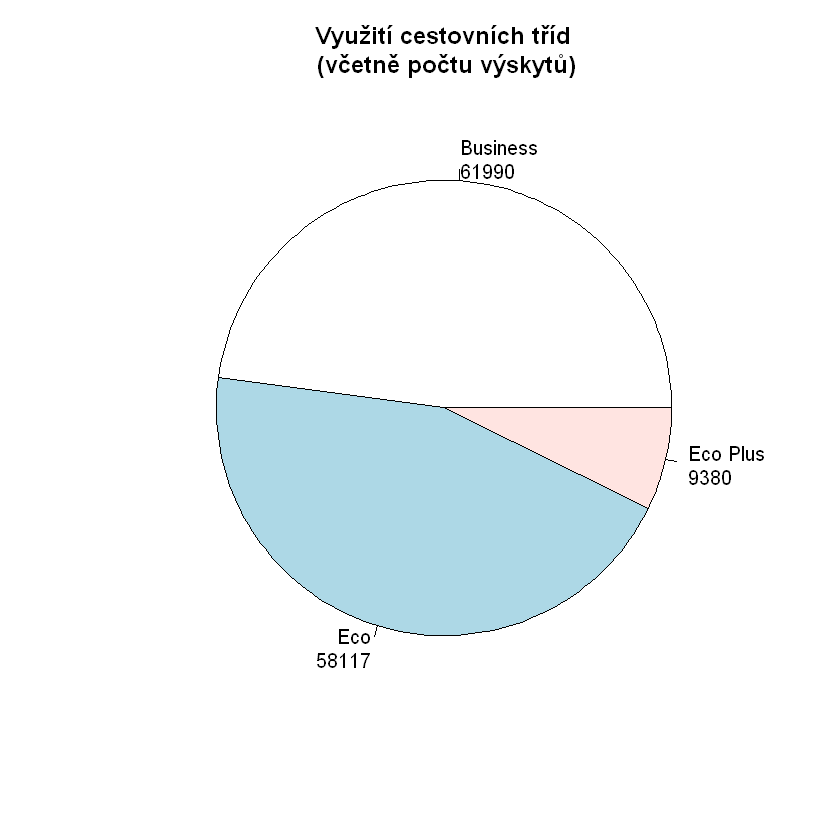

In [236]:
# Koláčový graf zobrazující zastoupení zakoupené třídy mezi dotazovanými

tab <- table(f$trida)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Využití cestovních tříd\n (včetně počtu výskytů)")

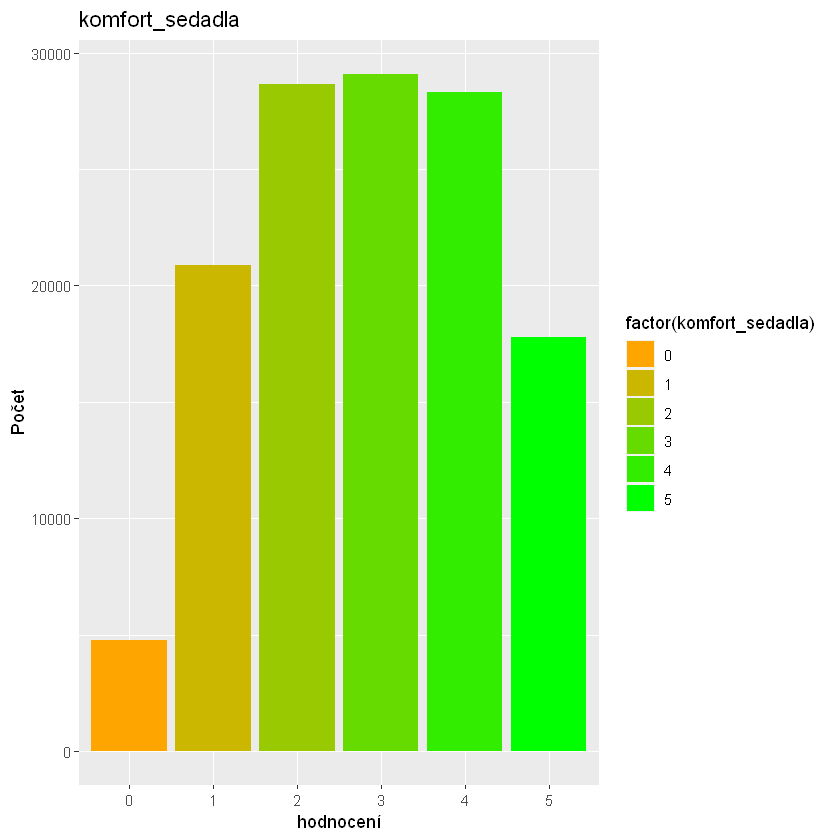

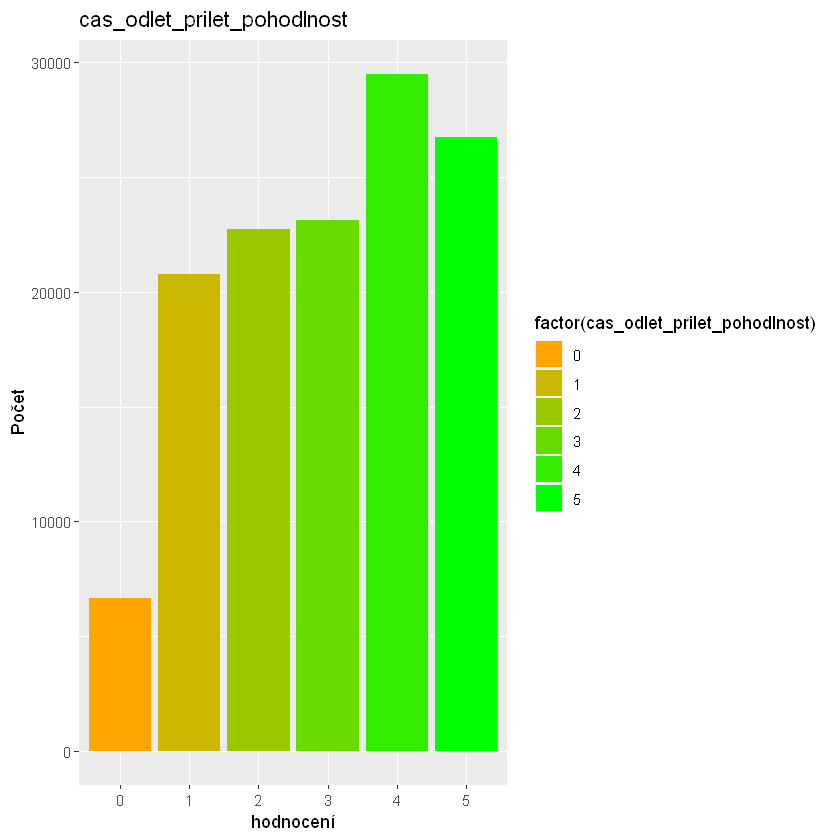

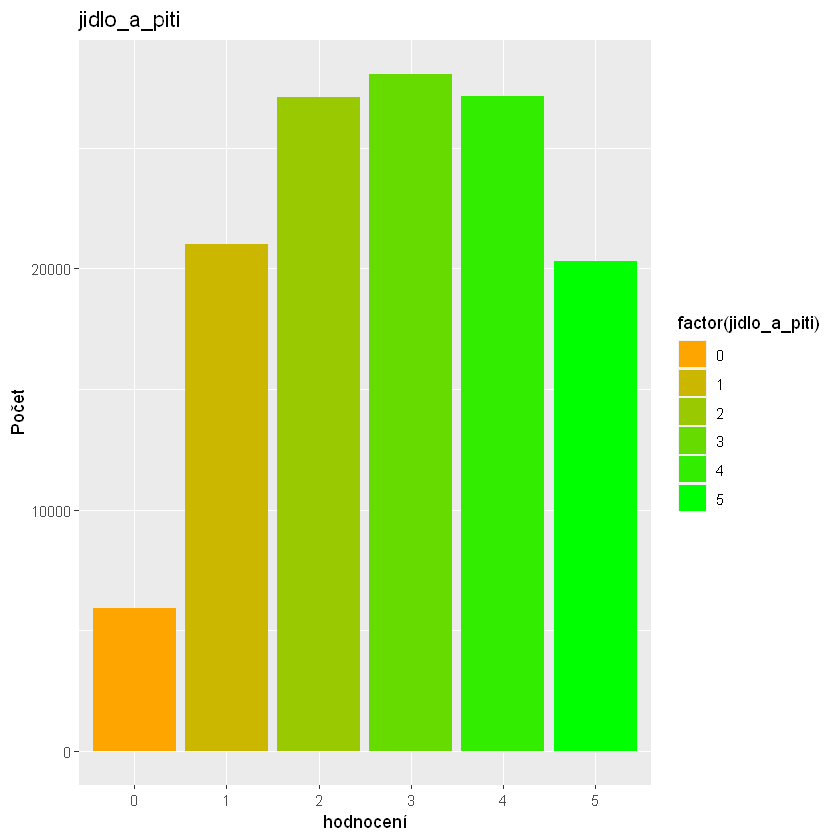

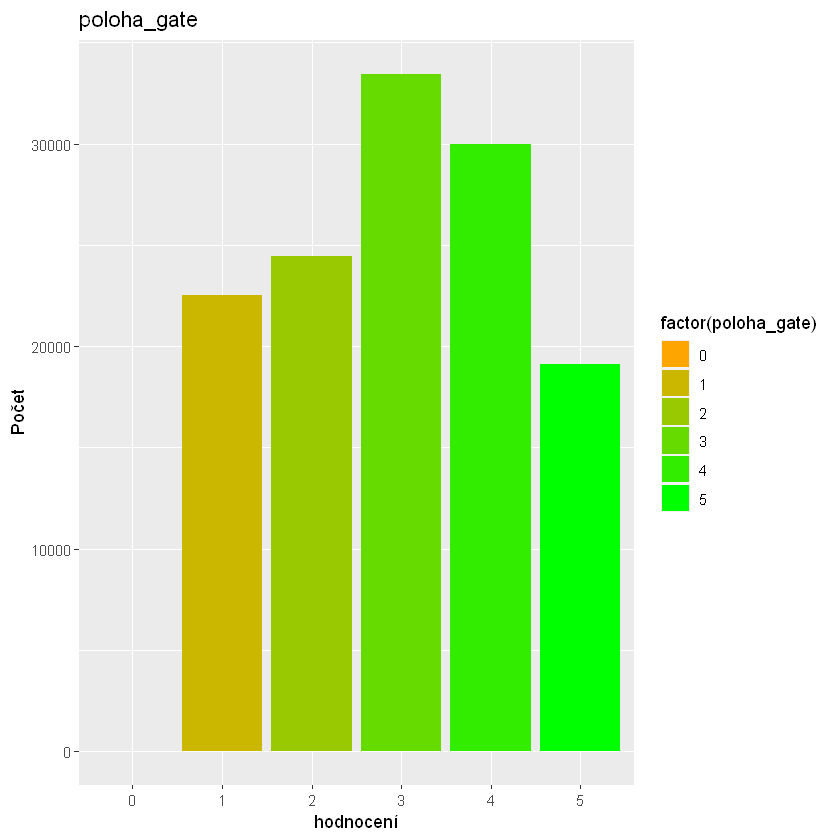

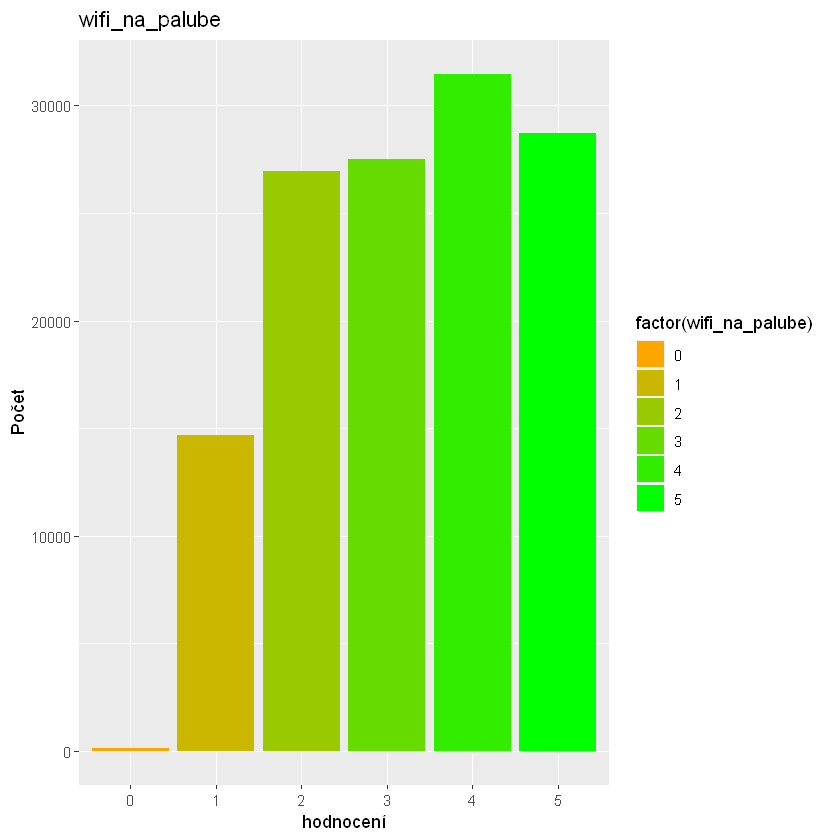

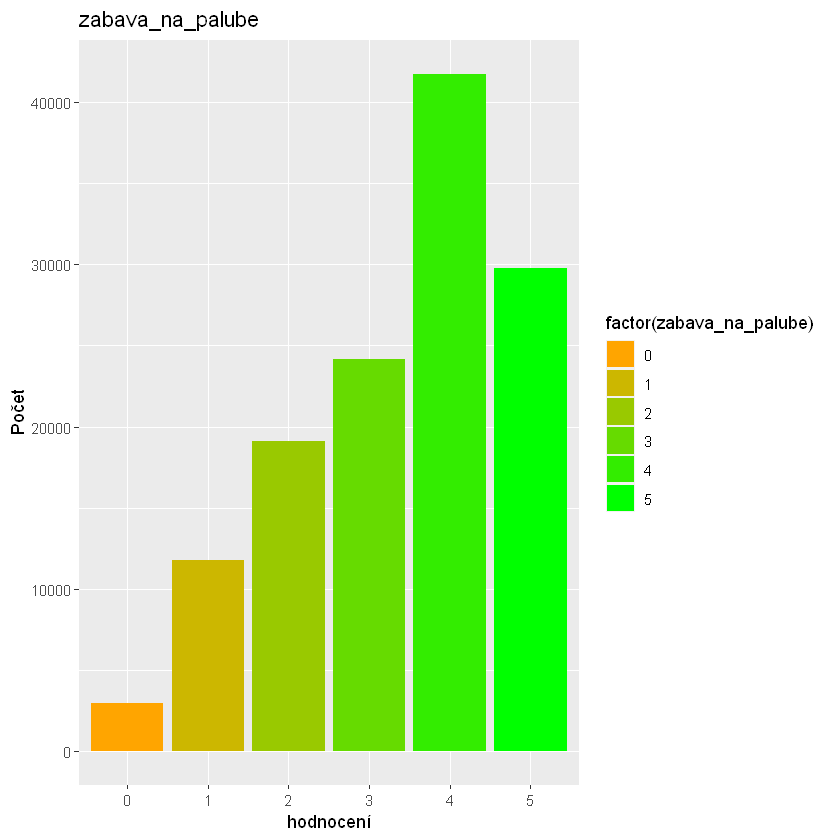

In [167]:
library(ggplot2)

colors <- colorRampPalette(c("green", "orange"))(6)

# Vykreslení sloupce "cas_odlet_prilet_pohodlnost
ggplot(f, aes(x = komfort_sedadla, fill = factor(komfort_sedadla))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("komfort_sedadla")

ggplot(f, aes(x = cas_odlet_prilet_pohodlnost, fill = factor(cas_odlet_prilet_pohodlnost))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("cas_odlet_prilet_pohodlnost")


ggplot(f, aes(x = jidlo_a_piti, fill = factor(jidlo_a_piti))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("jidlo_a_piti")


ggplot(f, aes(x = poloha_gate, fill = factor(poloha_gate))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("poloha_gate")

ggplot(f, aes(x = wifi_na_palube, fill = factor(wifi_na_palube))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("wifi_na_palube")


ggplot(f, aes(x = zabava_na_palube, fill = factor(zabava_na_palube))) +
  geom_bar() +
  scale_fill_manual(values = rev(colors)) +
  xlab("hodnocení") +
  ylab("Počet") +
  ggtitle("zabava_na_palube")

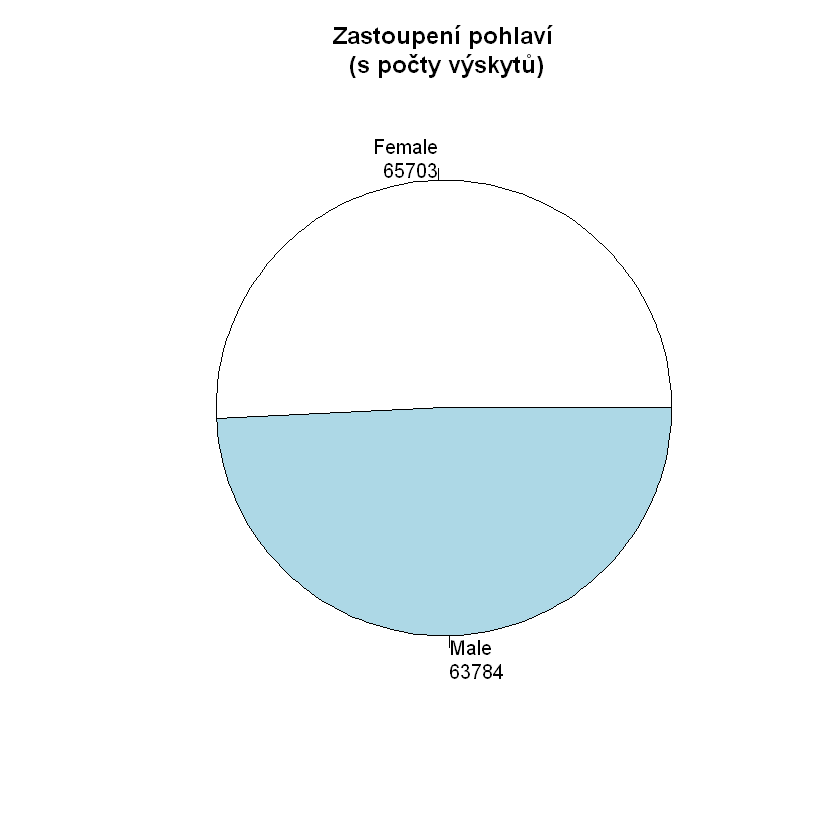

In [240]:
# Koláčový graf zobrazující zastoupení pohlaví mezi dotazovanými

tab <- table(f$pohlavi)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Zastoupení pohlaví\n (s počty výskytů)") 

Muži a ženy představují v celkovém souboru údajů téměř stejný podíl. 
Vidíme, že nespokojených zákazníků mužského pohlaví je více než žen.

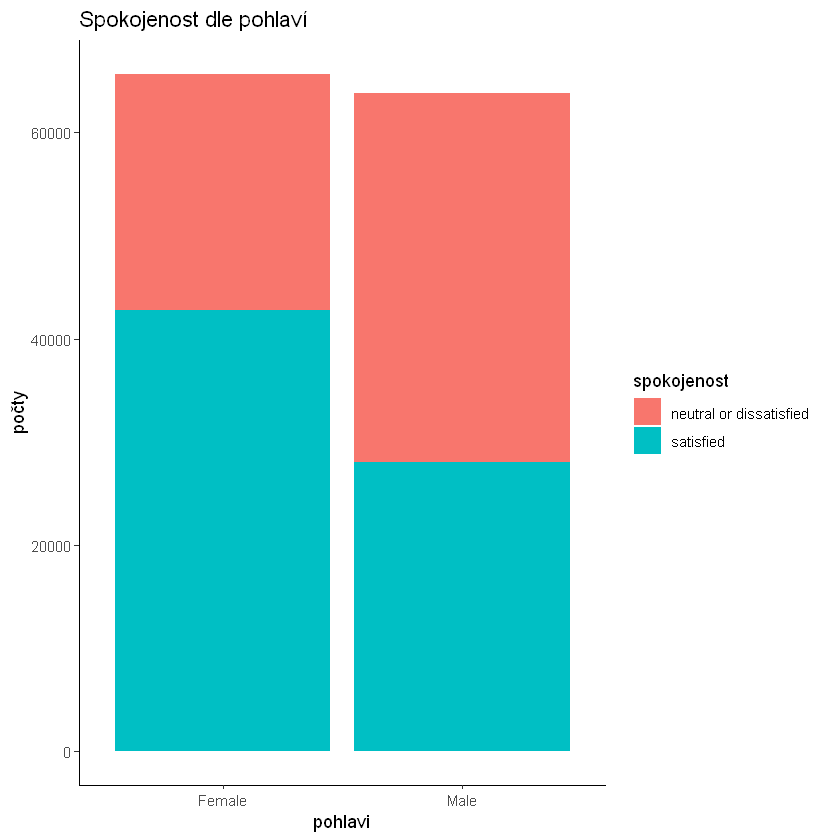

In [277]:
# Využijme nyní ggplotu pro zobrazení více proměnných a jejich poměru

ggplot(f, aes(x=pohlavi, fill=spokojenost)) +
  geom_bar() +
  theme_classic() +
  labs(title = "Spokojenost dle pohlaví", y="počty")

Ženy vykazují vyšší spokojenost než muži, jak však uvidíme dále, 
nespokojenost se koncentruje do konkrétních věkových intervalů.

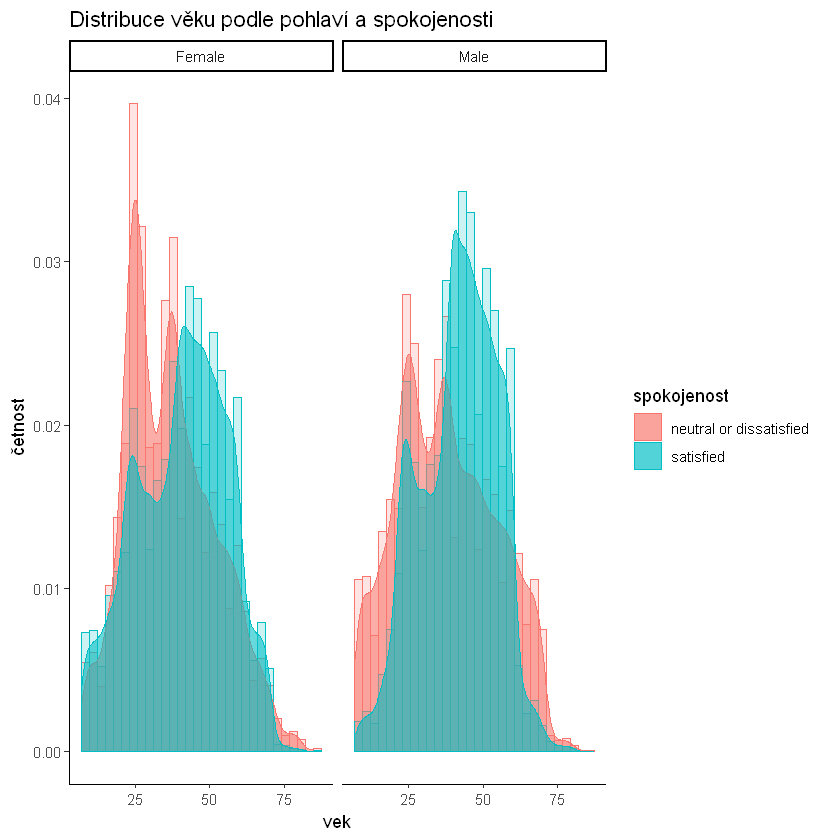

In [278]:
ggplot(f, aes(x=vek, fill=spokojenost, color=spokojenost)) +
  geom_histogram(aes(y=after_stat(density)), position="identity", alpha=0.2, bins=30)+ 
  geom_density(alpha=0.6)+
  labs(title="Distribuce věku podle pohlaví a spokojenosti", y="četnost") +
  theme_classic() +
  facet_grid(~pohlavi)

Nejvíce nespokojených zákazníků je kolem věku 25, dále pak od 40 do 60 let. 

Mladé ženy vykazují vyšší nespokojenost ve srovnání s muži, ale ve věku od 45 do 70 let 
je více nespokojených mužů.

Business a Eco třída mají vyrovnané zastoupení. 
Eco plus je pravděpodobně snahou 

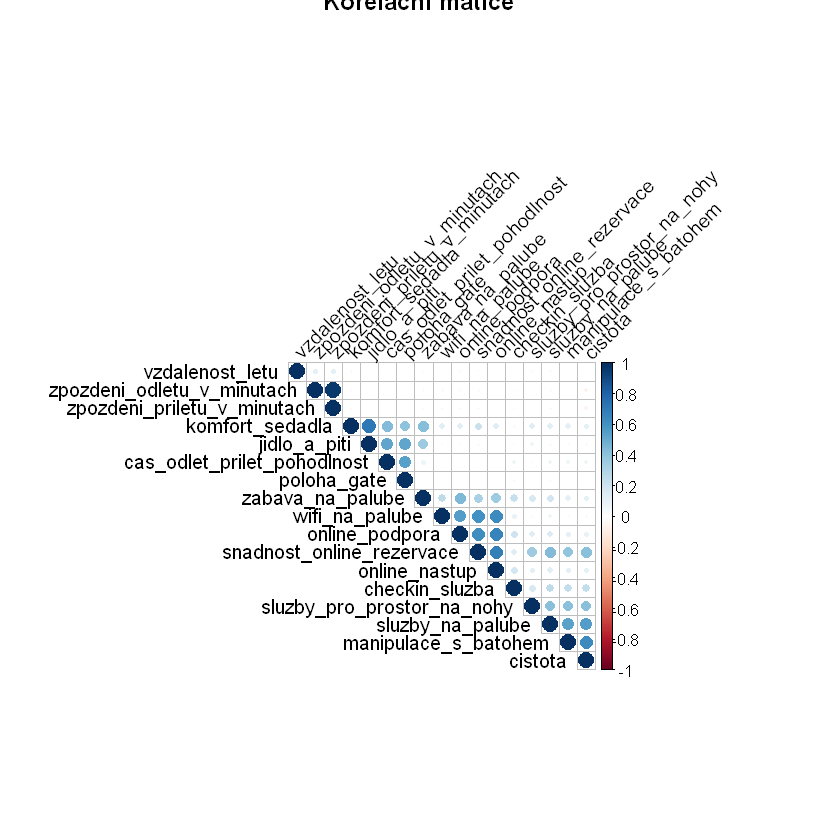

In [301]:
library(tidyverse)
library(corrplot)
library(dplyr)

# vzbereme sloupce a vzpočteme korelační matici
cor_matrix <- cor(f[, c("vzdalenost_letu", "komfort_sedadla", "cas_odlet_prilet_pohodlnost",
                           "jidlo_a_piti", "poloha_gate", "wifi_na_palube", "zabava_na_palube",
                           "online_podpora", "snadnost_online_rezervace", "sluzby_na_palube",
                           "sluzby_pro_prostor_na_nohy", "manipulace_s_batohem", "checkin_sluzba",
                           "cistota", "online_nastup", "zpozdeni_odletu_v_minutach",
                           "zpozdeni_priletu_v_minutach")])

corrplot(cor_matrix, main= "Korelační matice", type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

Online rezerace, online podpora i online nástup (check-in) mají vysokou korelaci.
Lze tedy usoudit že je zde skupina zákazníků, kteří preferují 
urychlení a usnadnění služeb přes aplikaci/telefon.

Další skupinou jsou zákazníci citliví na čistotu vyžadující dostatek prostoru.

Taktéž lidé, kteří hodnotící pozitivně jídlo budou pozitivně hodnotit komfort sedadla a naopak. 

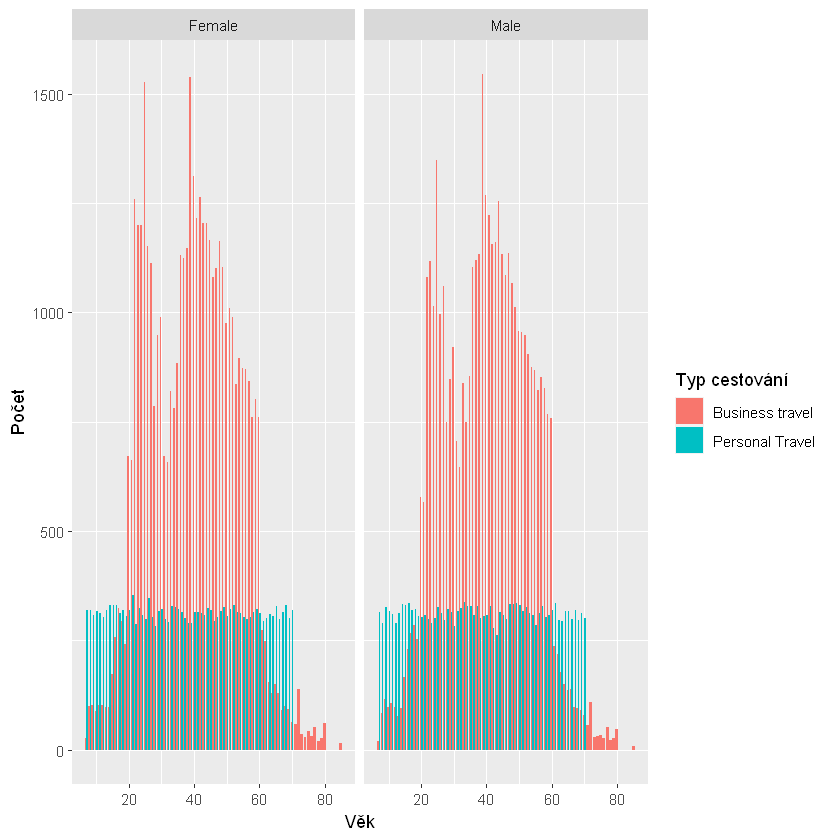

In [209]:
# Pracovní cesty mají výrazně nerovnou věkovou skladbu

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ pohlavi) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

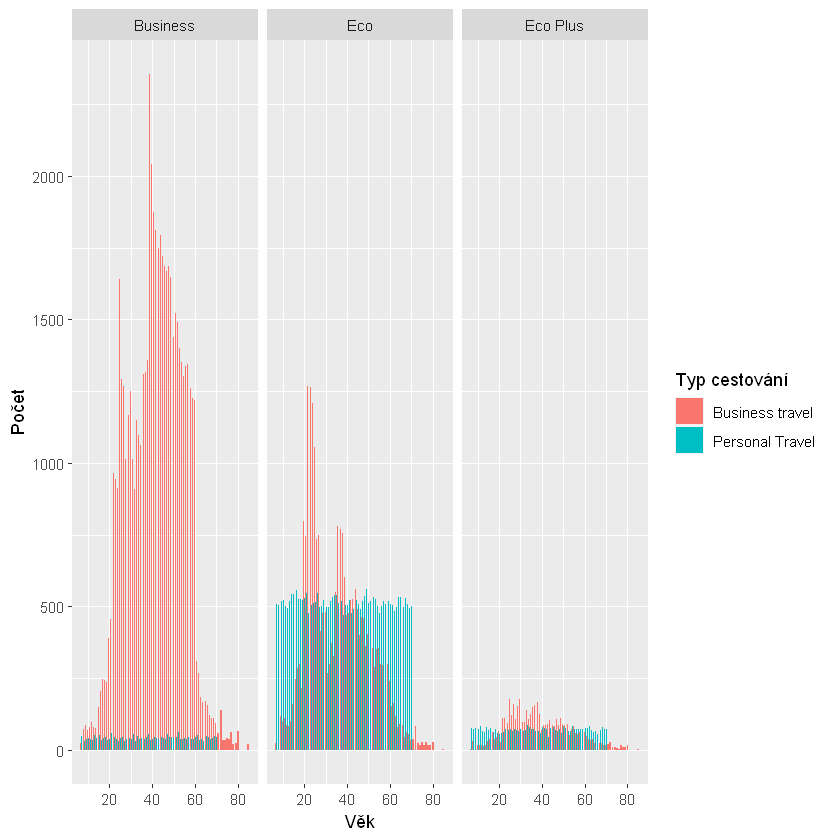

In [203]:
# Zákazníci Eco třídy většinu soukromých cest
# Naopak byznys třída je skutečně využívána lidmi cestujícími za prací

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ trida) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

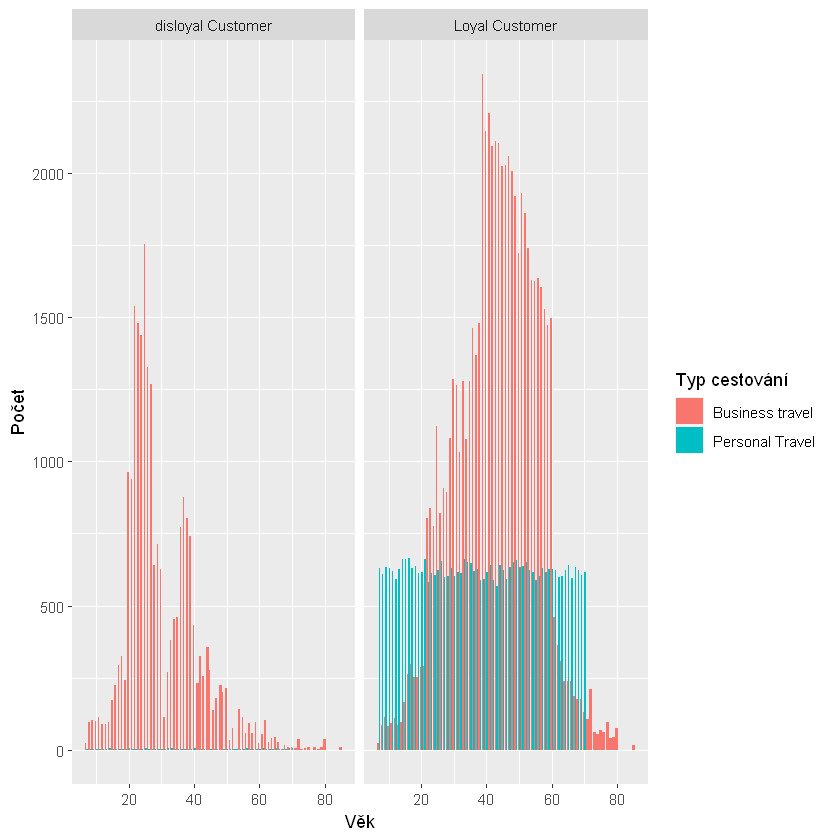

In [19]:
# Neloajalita zákazníků se omezuje téměř výhradně na cestující za prací

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ typ_zakaznika) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

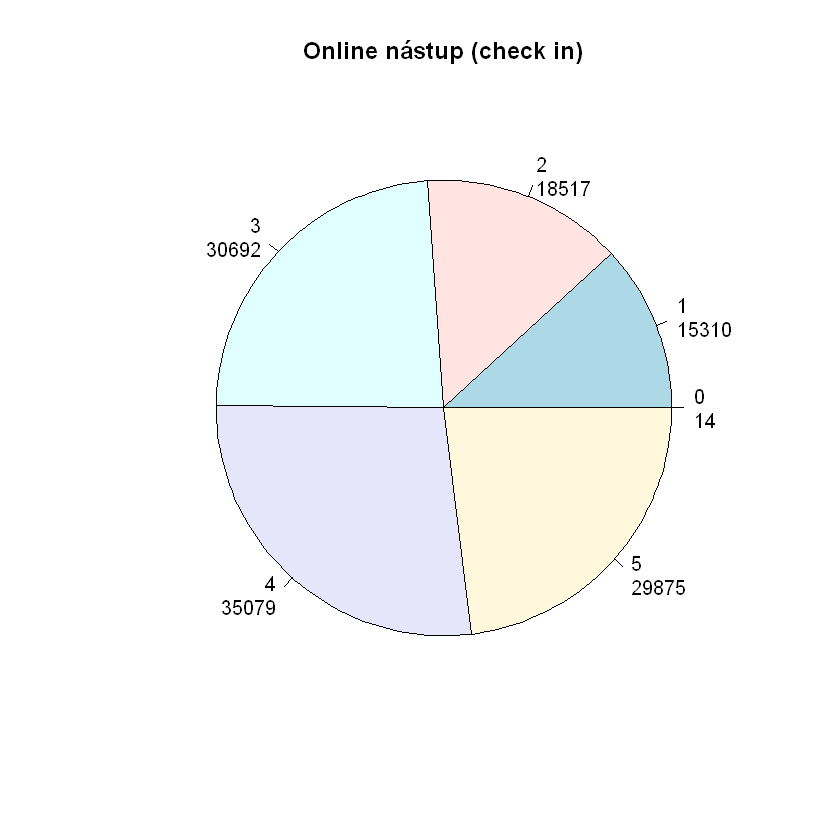

In [180]:
# Vezměme si nyní hodnocení wifi na palubě
# Vidíme, že je rozděleno do šesti kategorií.
# 

tab <- table(f$online_nastup)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Online nástup (check in)") 

In [181]:
# Pro přehlednost ještě tabulka zastoupení jednotlivých hodnot
table(f$online_nastup)


    0     1     2     3     4     5 
   14 15310 18517 30692 35079 29875 

Princip indikátoru Net Promoter score jsme si nejdříve otestovali na spokojenosti s připojením wifi. 
Zkoumaná proměnná může být na škále 0 až 100, 0 až 10 či 0 až 5 jako v našem případě. 

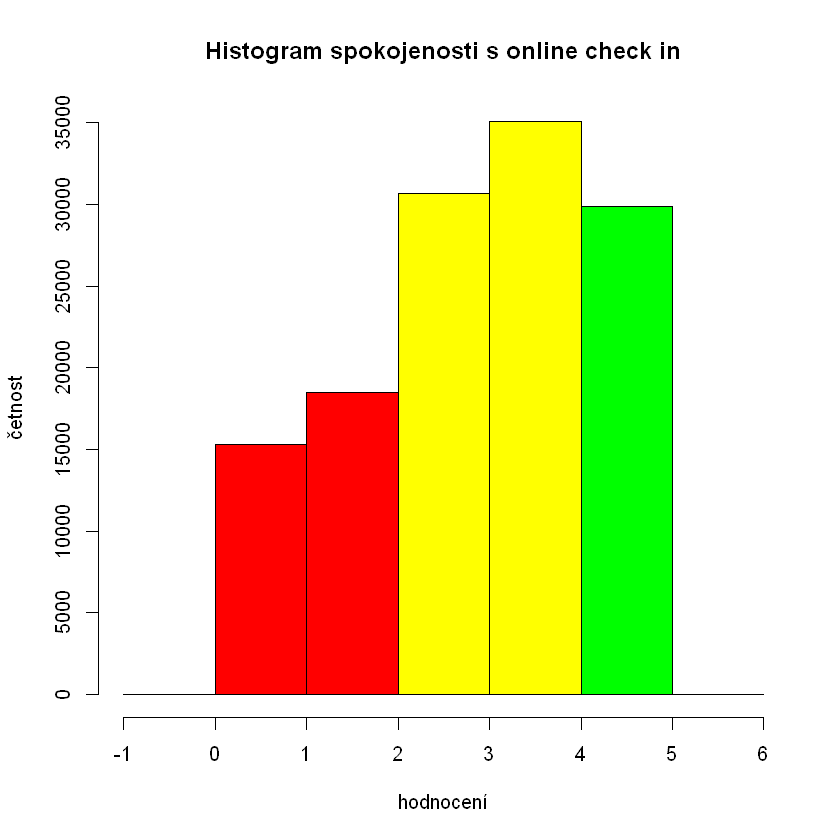

In [257]:
# Net Promoter Score
# První pokus přes histogram

online <- as.numeric(f$online_nastup)
hist(online, breaks=-1:6, col=c(rep("red",3), rep("yellow",2), rep("green", 1)), 
     main="Histogram spokojenosti s online check in", xlab="hodnocení", ylab="četnost")

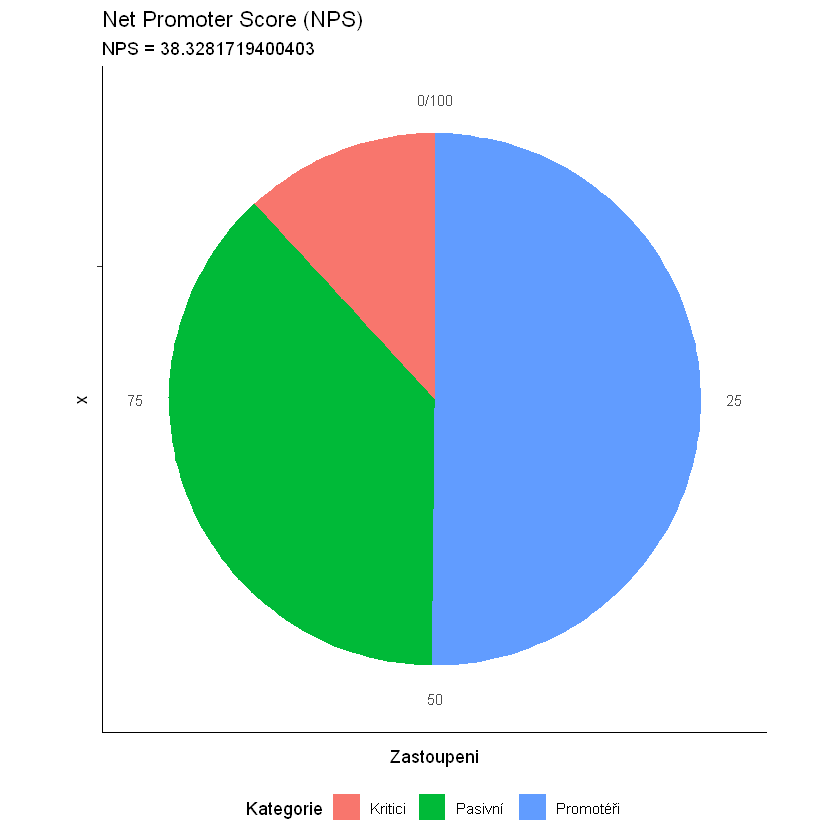

In [196]:
o <- as.numeric(f$online_nastup)

# Výpočet procenta promotérů, pasivních a kritiků
promoters <- sum(o >= 5) / length(o) * 100
passives <- sum(o >= 3 & o <= 4) / length(o) * 100
detractors <- sum(o <= 2) / length(o) * 100

# Výpočet Net Promoter Score (NPS)
nps <- promoters - detractors

# Vytvoření datového rámce pro graf
nps_data <- data.frame(Category = c("Promotéři", "Pasivní", "Kritici"),
                       Zastoupeni = c(promoters, passives, detractors))

# Vykreslení grafu pomocí ggplot2
ggplot(nps_data, aes(x = "", y = Zastoupeni, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_classic() +
  theme(legend.position = "bottom") +
  labs(title = "Net Promoter Score (NPS)",
       subtitle = paste0("NPS = ", nps),
       fill = "Kategorie")

Respondenti, kteří zvolili možnost 5, se nazývají propagátoři. 
Lidé, kteří zvolili hodnoty 3-4, se nazývají Pasivisté, 
hodnoty 0-2 se nazývají Odpůrci. 

Čím vyšší je hodnota NPS, tím je služba lepší. Obecně se předpokládá, 
že hodnota 70 % NPS je ideální skóre.

Warning message in brewer.pal(length(unique(f$spokojenost)), "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


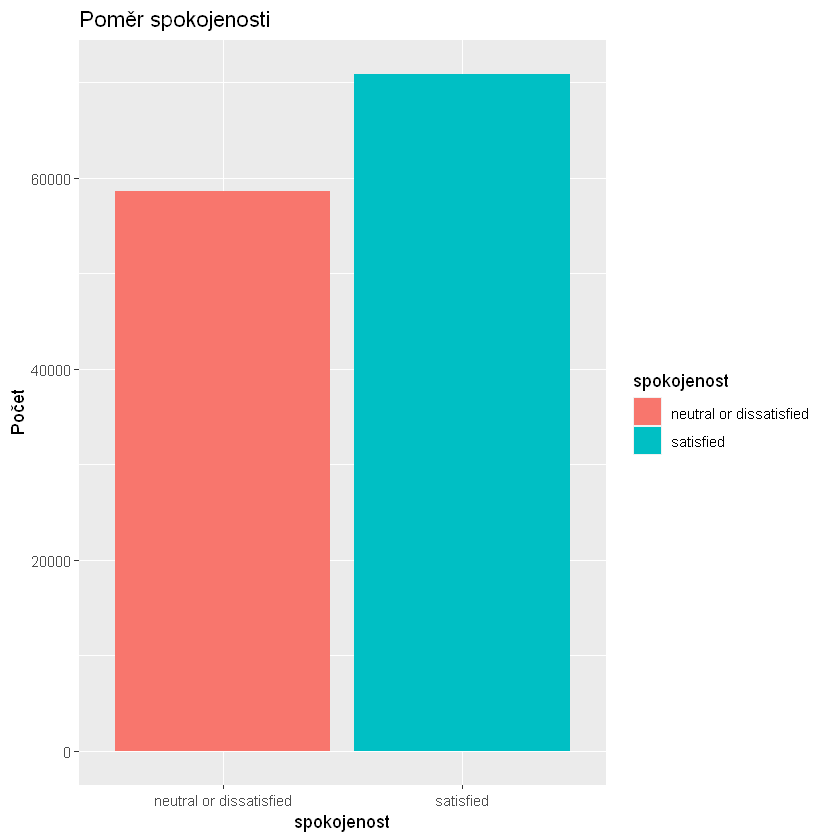

In [259]:
library(ggplot2)
library(RColorBrewer)

# Vytvoření palety barev pro jednotlivé hodnoty spokojenosti
palette <- brewer.pal(length(unique(f$spokojenost)), "Set1")

# Vykreslení spokojenosti pomocí ggplotu s různými barvami
ggplot(f, aes(x = spokojenost, fill = spokojenost)) +
  geom_bar() +
  labs(y = "Počet") +
  ggtitle("Poměr spokojenosti")

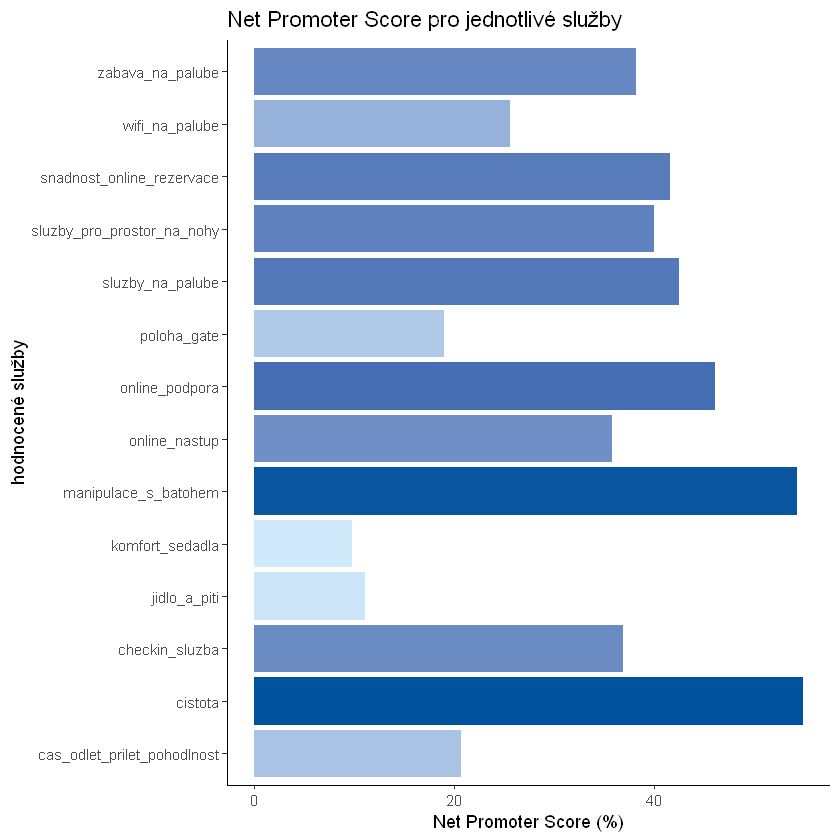

In [260]:
library(tidyverse)

# Vezmeme všechny sloupce s hodnocením 0 až 5 a převedeme na faktory
f <- f %>%
  mutate_at(vars(komfort_sedadla:online_nastup), factor, levels = 0:5)

# Definujeme si kritiky, pasivní zákazníky a promotéry.
# Čím vyšší hodnocení, tím lepší
# Taktéž si zadefinujeme výpočet Net promoter score 
calculate_nps <- function(x) {
  promoters <- sum(x %in% c(4, 5))
  detractors <- sum(x %in% c(0, 2))
  nps <- (promoters - detractors) / length(x) * 100
  return(nps)
}

nps_data <- f %>%
  summarize(across(komfort_sedadla:online_nastup, calculate_nps)) %>%
  pivot_longer(everything(), names_to = "sloupec", values_to = "nps")

# Vykreslení grafů
ggplot(nps_data, aes(x = sloupec, y = nps, fill = nps)) +
  geom_bar(stat = "identity") +
  labs(x = "hodnocené služby", y = "Net Promoter Score (%)") +
  ggtitle("Net Promoter Score pro jednotlivé služby") +
  theme_classic() +
  theme(legend.position = "none") +
  coord_flip() +
  scale_fill_gradient(low = "#D1EAFB", high = "#00539F")

In [287]:
library(tidyverse)
library(corrplot)

# Převod faktorů na numerický formát
f_numeric <- f %>%
  mutate(across(komfort_sedadla:online_nastup, as.numeric))

# Výběr sloupců "komfort_sedadla" až "online_nastup"
selected_cols <- f_numeric %>% select(komfort_sedadla:online_nastup)

# Výpočet matice korelace
cor_matrix <- cor(selected_cols, method = "pearson")

# Vykreslení korelační matice
corrplot(cor_matrix, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

ERROR: Error in select(., komfort_sedadla:online_nastup): unused argument (komfort_sedadla:online_nastup)


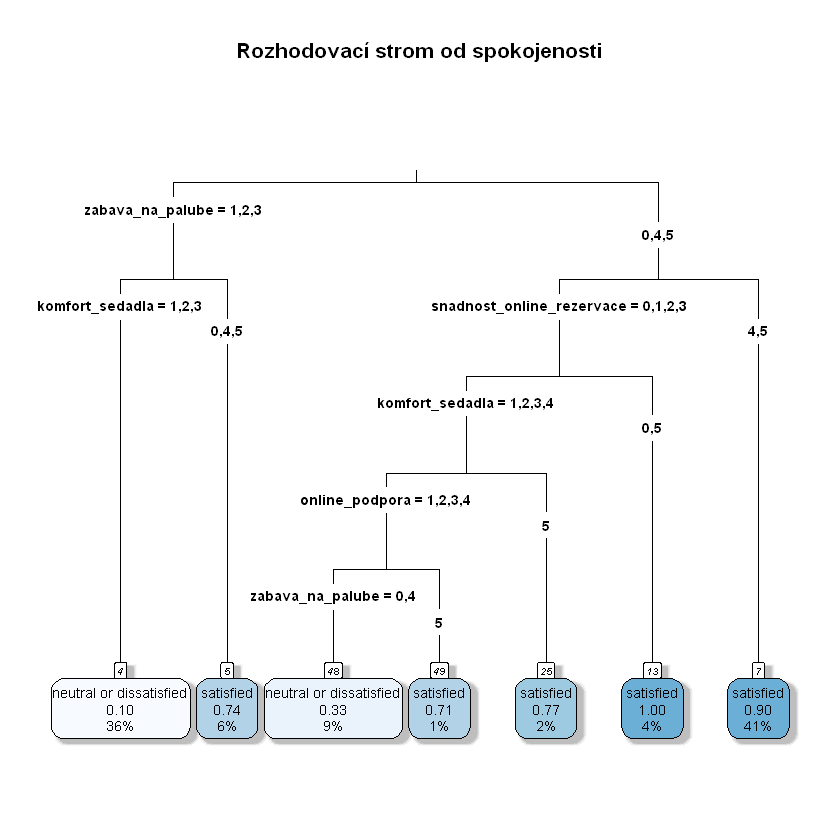

In [264]:
# Nyní se podívejme na analýzu pomocí rozhodovacího stromu
# Zajímá nás proměnná spokojenost a jakým způsobem se na její hodnotě podílí ostatní proměnné.

library(rpart)
library(rpart.plot)

tree_model <- rpart(spokojenost ~ ., data = f, method = "class")


# Vykreslení rozhodovacího stromu pomocí rpart.plot
rpart.plot(tree_model, box.palette = "Blues", 
           shadow.col = "gray", nn = TRUE, type = 3, 
           main="Rozhodovací strom od spokojenosti")

In [ ]:
Výsledek rozhodovacího stromu není přesvědčivý, 
algoritmus si z neznámého důvodu bral k sobě hodnoty 0 a 5, 
které na sebe nenavazují.

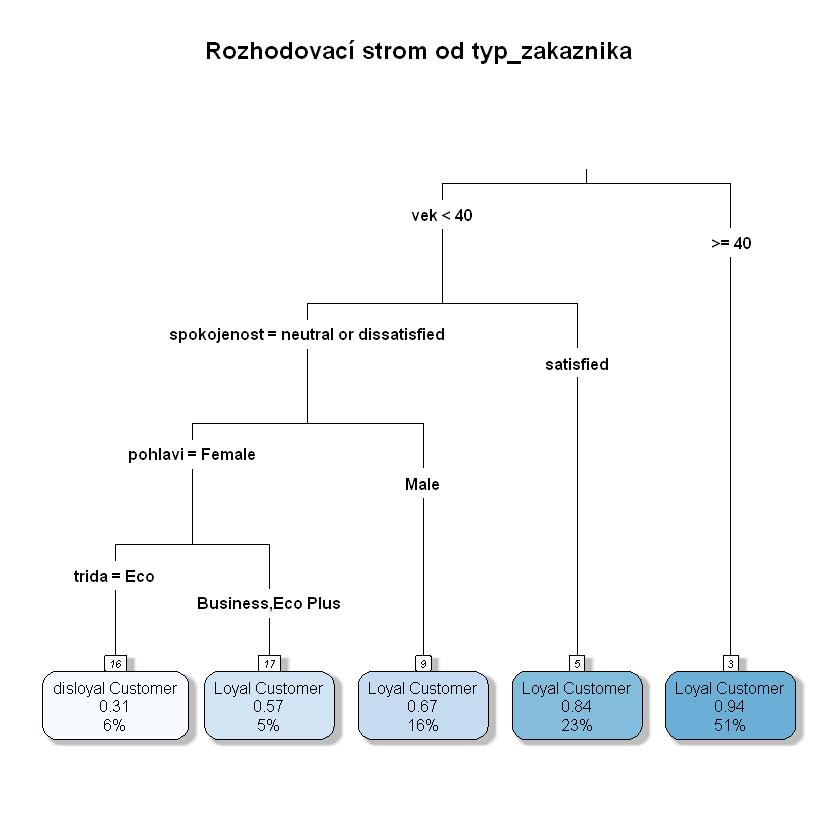

In [263]:
library(rpart)
library(rpart.plot)

tree_model2 <- rpart(typ_zakaznika ~ pohlavi+vek+trida+spokojenost,data = f, method = "class")


# Vykreslení rozhodovacího stromu pomocí rpart.plot
rpart.plot(tree_model2, box.palette = "Blues", 
           shadow.col = "gray", nn = TRUE, type = 3, main="Rozhodovací strom od typ_zakaznika")

In [ ]:
Q:
Co se v projektu přiučil Pavel?

A:
- Zjistil jsem, že mi Jupyter Notebook vyhovuje více než RStudio, posledních 70 % analýzy jsem prováděl přes Jupyter.
- Založil jsem si poprvé účet v GitHubu, do repository vložil soubor z Jupyteru a ten následně zveřejnil přes NBviewer.org.
- Poměrně jednoduchý ggplot je silný nástroj, který dokáže efektivně zodpovídat výzkumné otázky (zapojení až tří proměnných).
- Nejdříve si ovřit licenci! Viz níže:

Licence:
Až ke konci projektu jsem zjistil, že je (licence neznámá).
Autor na dotazy ohledně licence neodpověděl, nicméně jeho dataset byl od zveřejnění předmětem již mnoha analýz v Pythonu.